## Performing multilinear Regression on Toyata Corolla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot 

In [2]:
data = pd.read_csv('C:/Users/Anusha/Desktop/ExcelRProjects/dataset/Toyoto_Corrola.csv')
data

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [3]:
data2 = pd.read_csv('C:/Users/Anusha/Downloads/ToyotaCorolla.csv', encoding='latin1')

###### As per the given problem statement we have to predict the price using 
###### Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
######  from the above dataset as we can see model and id will not be able to predict the price value we can remove those columns

In [4]:
## add the required columns to final dataset
data['cc']=data2['cc']

In [5]:
data['Quarterly_Tax']=data2['Quarterly_Tax']

### Final Data Set required for the Problem Statement

In [6]:
toyota_data = data.drop(['Id','Model','Cylinders'],axis=1)
toyota_data

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax
0,13500,23,46986,90,3,5,1165,2000,210
1,13750,23,72937,90,3,5,1165,2000,210
2,13950,24,41711,90,3,5,1165,2000,210
3,14950,26,48000,90,3,5,1165,2000,210
4,13750,30,38500,90,3,5,1170,2000,210
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025,1300,69
1432,10845,72,19000,86,3,5,1015,1300,69
1433,8500,71,17016,86,3,5,1015,1300,69
1434,7250,70,16916,86,3,5,1015,1300,69


## Perform Initial EDA

In [7]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Weight         1436 non-null   int64
 7   cc             1436 non-null   int64
 8   Quarterly_Tax  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
# there are no null values exisiting in the given variables
# another way of checking null values
toyota_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
Doors            0
Gears            0
Weight           0
cc               0
Quarterly_Tax    0
dtype: int64

In [9]:
# check for the duplicated values
toyota_data[toyota_data.duplicated()]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax
113,24950,8,13253,116,5,5,1320,2000,234


In [10]:
toyota_data[toyota_data.Price==24950]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax
112,24950,8,13253,116,5,5,1320,2000,234
113,24950,8,13253,116,5,5,1320,2000,234


In [11]:
# as both the rows 112 and 113 are containing same observation values we can eliminate one record
# dropping duplicate values
toyota_data.drop_duplicates(keep=False,inplace=True)

In [12]:
toyota_data[toyota_data.duplicated()]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax


###### duplicate records are dropped

###### Check for the data distribution and relationship between variables

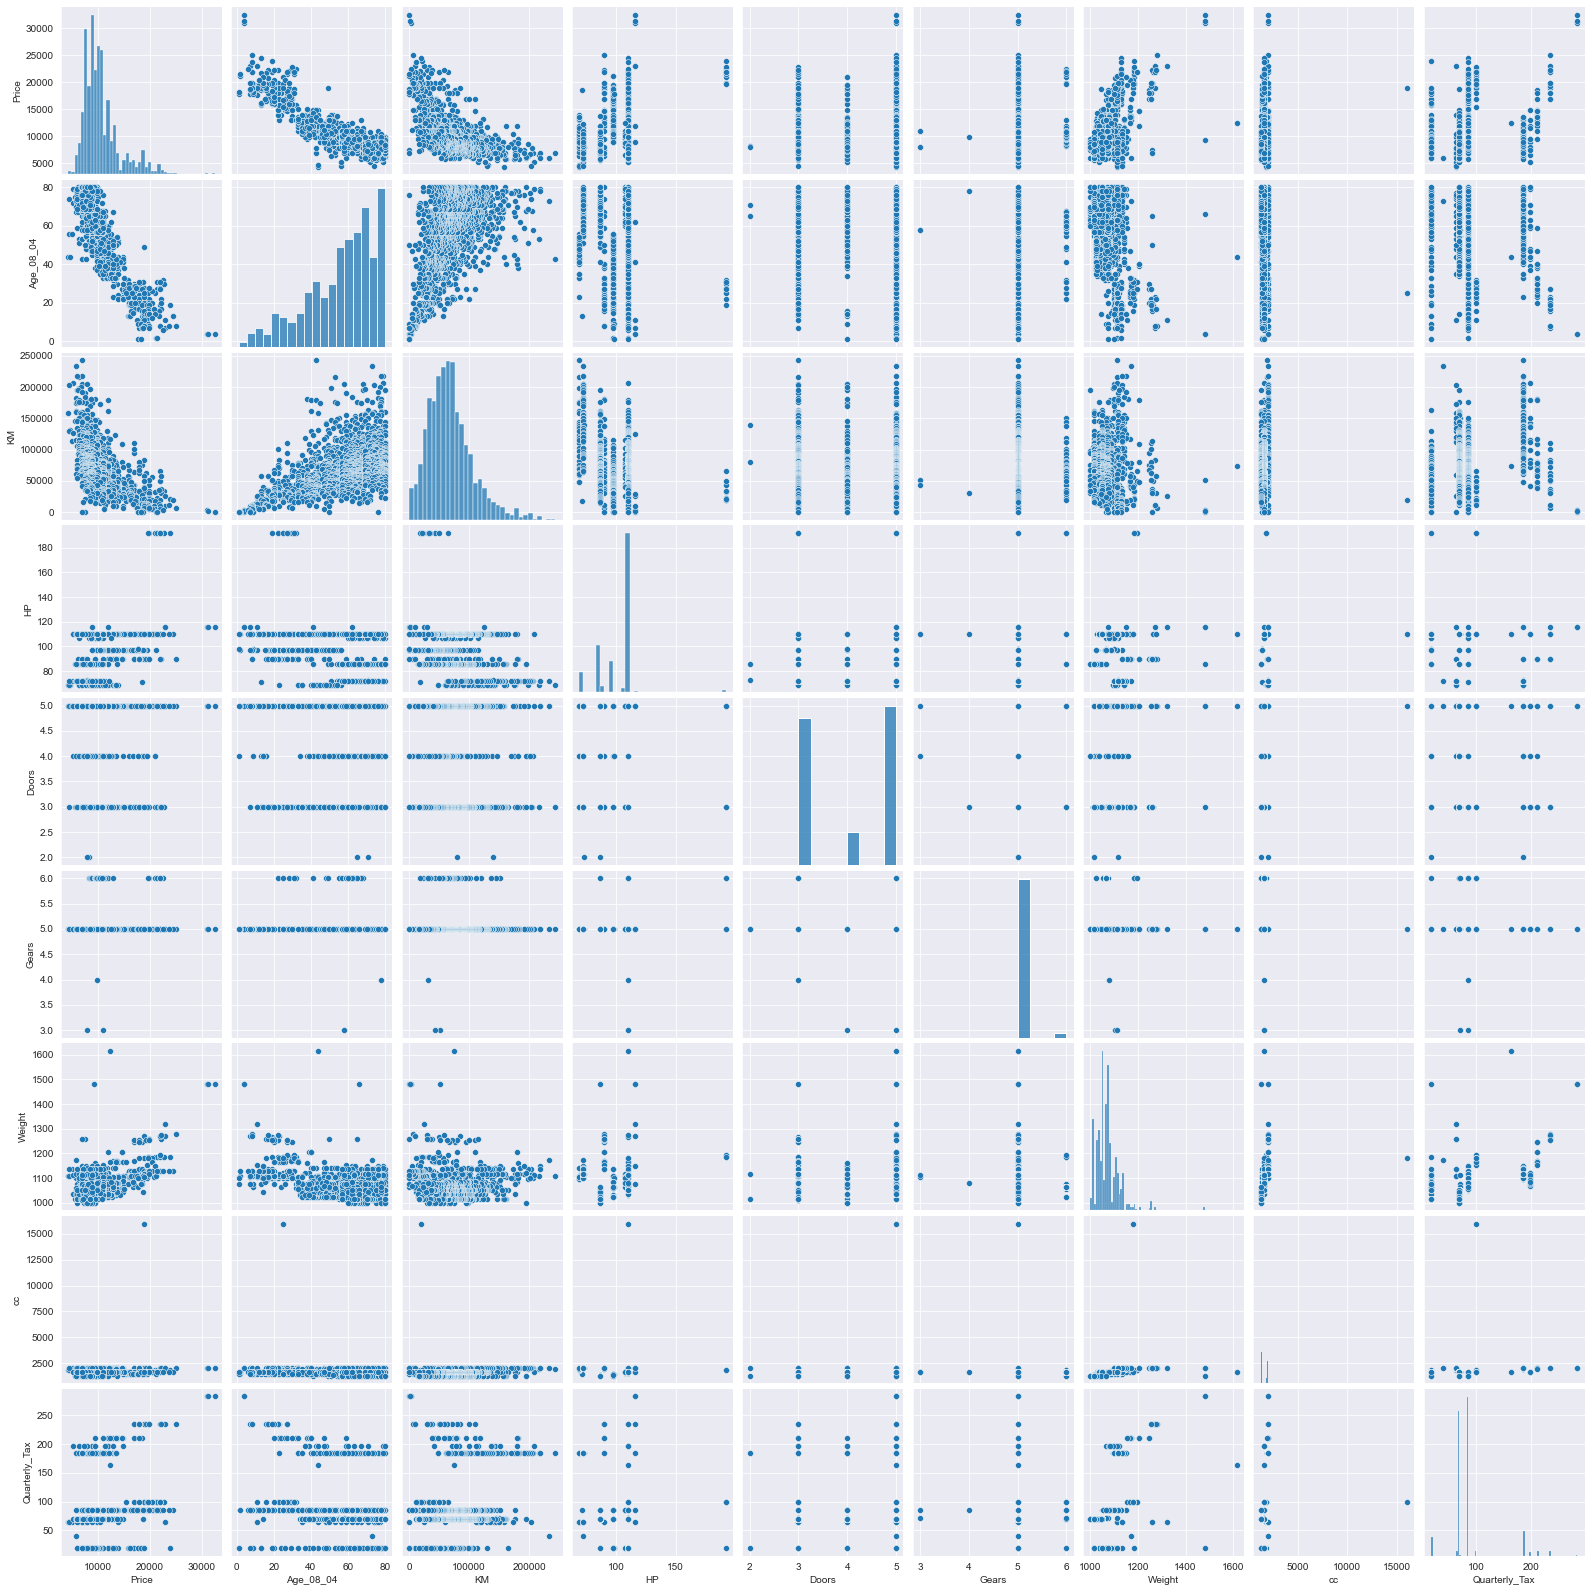

In [13]:
sns.set_style(style = "darkgrid")
sns.pairplot(toyota_data)

###### Most of the variables are skewed in nature and or not linear for detail analysis we can create an eda report

In [77]:
import pandas_profiling as pp
import sweetviz as sv
EDA_report= pp.ProfileReport(toyota_data)
EDA_report.to_file(output_file='report_Toyota_Corolla.html')

In [14]:
#strength of the relationship between input and output variables
toyota_data.corr()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax
Price,1.000000,-0.875959,-0.568884,0.313276,0.181865,0.064569,0.570394,0.122337,0.203654
Age_08_04,-0.875959,1.000000,0.503470,-0.153956,-0.145489,-0.005896,-0.462647,-0.095004,-0.188131
KM,-0.568884,0.503470,1.000000,-0.332268,-0.034186,0.014757,-0.019253,0.104966,0.288524
HP,0.313276,-0.153956,-0.332268,1.000000,0.091179,0.209807,0.084633,0.034556,-0.306191
Doors,0.181865,-0.145489,-0.034186,0.091179,1.000000,-0.160060,0.300851,0.078602,0.105323
Gears,0.064569,-0.005896,0.014757,0.209807,-0.160060,1.000000,0.021875,0.014835,-0.004795
Weight,0.570394,-0.462647,-0.019253,0.084633,0.300851,0.021875,1.000000,0.334525,0.617740
cc,0.122337,-0.095004,0.104966,0.034556,0.078602,0.014835,0.334525,1.000000,0.304962
Quarterly_Tax,0.203654,-0.188131,0.288524,-0.306191,0.105323,-0.004795,0.617740,0.304962,1.000000


#### Model Assumptions about Predictors
###### There should not exist any collinearity problem  b/w input variables
###### To eliminate collinearity we can use backword elimination as a feature selecting method or different methods
###### step1: build basic model using all the variables

In [89]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Doors+Weight+cc+Quarterly_Tax',data=toyota_data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1159.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        20:48:43   Log-Likelihood:                -12317.
No. Observations:                1433   AIC:                         2.465e+04
Df Residuals:                    1424   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6107.3278   1385.259     -4.409      0.000   -8824.696   -3389.960
Age_08_04      -120.5621      2.561    -47.076      0.000    -125.586    -115.538
KM               -0.0177      0.001    -13.889      0.000      -0.020      -0.015
HP               39.0975      2.913     13.423      0.000      33.384      44.811
Gears           530.4564    192.795      2.751      0.006     152.264     908.648
Doors           -25.7661     39.228     -0.657      0.511    -102.718      51.186
Weight           19.9555      1.121     17.807      0.000      17.757      22.154
cc               -2.4927      0.308     -8.106      0.000      -3.096      -1.889
Quarterly_Tax     8.8343      1.428      6.185      0.000       6.032      11.636
==============================================================================
Omnibus:                      237.357   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2564.056
Skew:                          -0.411   Prob(JB):                         0.00
Kurtosis:                       9.501   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### from the above model we can conclude Doors and cc are not significant as p>0.05

###### Build Simple Linear Regression models to eliminate a variable

In [16]:
# To eliminate one of this 2 variables lets build models for price~ doors and price~cc
#model building using price v/s doors
import statsmodels.formula.api as smf
model_doors = smf.ols('Price~Doors',data = toyota_data).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     48.98
Date:                Sat, 08 May 2021   Prob (F-statistic):           3.95e-12
Time:                        19:56:45   Log-Likelihood:                -13749.
No. Observations:                1434   AIC:                         2.750e+04
Df Residuals:                    1432   BIC:                         2.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7947.3729    405.735     19.588      0.000    7151.474    8743.272
Doors        685.4084     97.932      6.999      0.000     493.302     877.515
==============================================================================
Omnibus:                      464.122   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1400.519
Skew:                           1.642   Prob(JB):                    7.61e-305
Kurtosis:                       6.557   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#model building using price v/s cc
import statsmodels.formula.api as smf
model_doors = smf.ols('Price~cc',data = toyota_data).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     21.76
Date:                Sat, 08 May 2021   Prob (F-statistic):           3.38e-06
Time:                        19:56:50   Log-Likelihood:                -13762.
No. Observations:                1434   AIC:                         2.753e+04
Df Residuals:                    1432   BIC:                         2.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9079.5912    362.196     25.068      0.000    8369.099    9790.083
cc             1.0350      0.222      4.664      0.000       0.600       1.470
==============================================================================
Omnibus:                      462.309   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1381.976
Skew:                           1.640   Prob(JB):                    8.08e-301
Kurtosis:                       6.517   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Individually as the pvalues for both cc and doors is significant 
###### Calculate VIF values to if there is any colinearity problem existing for the given data

In [18]:
# building models to caluclate VIF values for each variables
rsq_Age = smf.ols('Age_08_04~KM+HP+Doors+Gears+Weight+cc+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_Age= 1/(1-rsq_Age)

rsq_km = smf.ols('KM~Age_08_04+HP+Doors+Gears+Weight+cc+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_km= 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age_08_04+Doors+Gears+Weight+cc+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_hp= 1/(1-rsq_hp)

rsq_doors = smf.ols('Doors~KM+HP+Age_08_04+Gears+Weight+cc+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_doors= 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+Age_08_04+Doors+Weight+cc+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_gears= 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~KM+HP+Doors+Gears+Age_08_04+cc+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_weight= 1/(1-rsq_weight)

rsq_cc = smf.ols('cc~KM+HP+Doors+Gears+Age_08_04+Weight+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_cc= 1/(1-rsq_cc)

rsq_tax = smf.ols('Quarterly_Tax~KM+HP+Doors+Gears+Age_08_04+Weight+cc',data=toyota_data).fit().rsquared
vif_tax= 1/(1-rsq_tax)

VIF_table = {'Features':['Age_08_04','KM','HP','Doors','Gears','Weight','cc','Quarterly_Tax'],
             'VIF_Values':[vif_Age,vif_km,vif_hp,vif_doors,vif_gears,vif_weight,vif_cc,vif_tax]}
VIF_table= pd.DataFrame(VIF_table)
VIF_table

,Features,VIF_Values
0,Age_08_04,1.867851
1,KM,1.757559
2,HP,1.418964
3,Doors,1.155209
4,Gears,1.098968
5,Weight,2.457974
6,cc,1.163061
7,Quarterly_Tax,2.279393


###### As none of the VIF values is greater than 10 we can conclude there is no coliearity problem

###### To conclude the same we can further analyse by creating partial regression plots

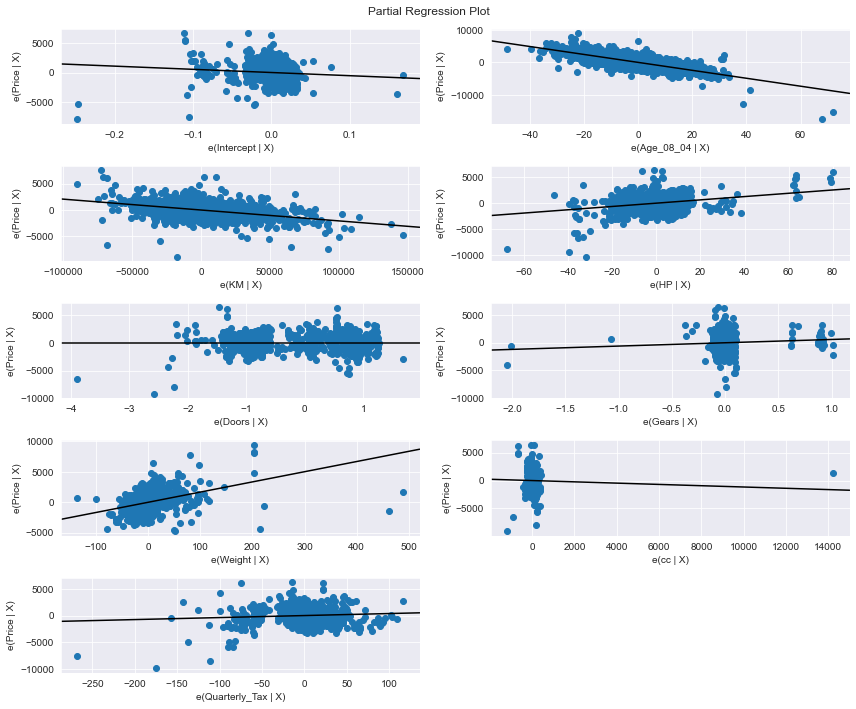

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,10))
fig=sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

###### few variables are not highly contibuting towards model builing but still they are linear to some extent to the output variable and as there is no collinarity probem we can consider all the variables for model building

##### Assumption 2
##### No Influential values should be exiting in the dataset
##### identifing Influencial observations using basic model

In [22]:
# identifing influencial observations
model_influence= model.get_influence()
(c,_)=model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distances')

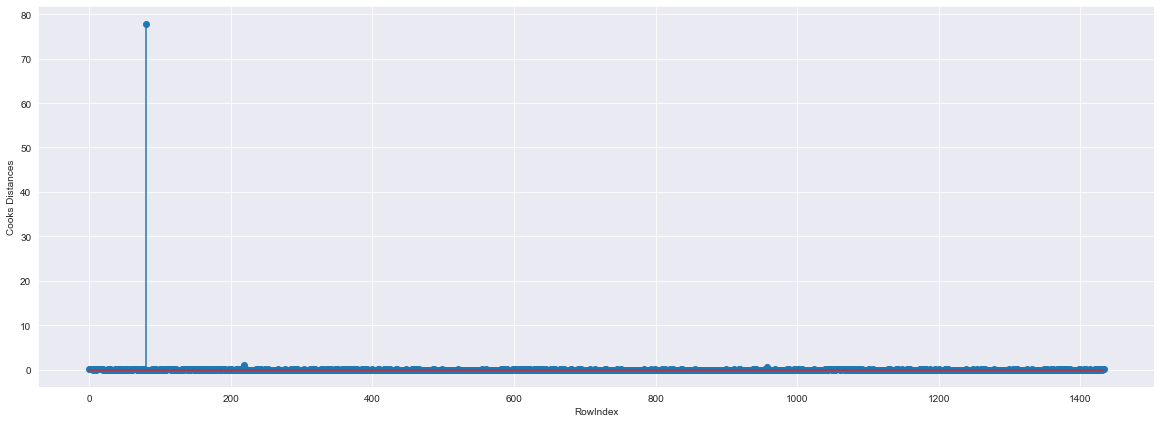

In [23]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota_data)),np.round(c,3))
plt.xlabel('RowIndex')
plt.ylabel('Cooks Distances')

In [24]:
# get index and values of influencer where c value is more than 0.5
# argmax gives the index value and max gives the maximum cooks distance value
(np.argmax(c),np.max(c))

(80, 77.90978148671316)

In [25]:
toyota_data.iloc[80:83,:]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax
80,18950,25,20019,110,5,5,1180,16000,100
81,17250,29,20000,110,5,5,1115,1600,85
82,15450,25,17003,97,5,5,1110,1400,85


###### As we can see cc value is highly varing for 80 th record compared to other records which is influencial as cooks distance is >0.5

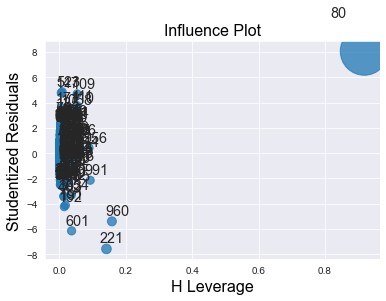

In [26]:
## The same can be concluded using influence index plot using H leverage
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [27]:
# H Leveerage Threshold value
k = toyota_data.shape[1] # no. of columns
n=toyota_data.shape[0]  #no. of rows
lev=3*((k+1)/n)
print("The threshold value for hvalue of the model: ",lev)

The threshold value for hvalue of the model:  0.02092050209205021


###### There is only one data record having lev value greater than threshold at index 80

###### From cooks distance and index plot we can conclude 80th record is an influential record

In [28]:
## We can drop this record
toyota_data.drop([80],axis=0,inplace=True)

##### Assumptions about errors
##### Residual Analysis

###### Test for normality of residuals -  If most of the datapoints fall on the line the we can say errors as normally distributed

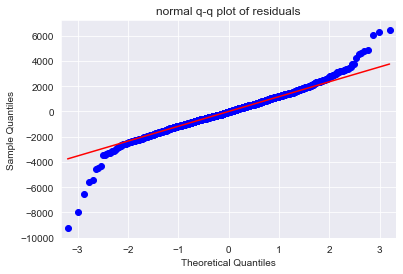

In [29]:
import statsmodels.api as sm
resid=model.resid #model.resid gives the error values i.e actual - predicted
qqplot=sm.qqplot(resid,line='q')
plt.title("normal q-q plot of residuals")
plt.show()

###### As most of the errors are falling on the line we can conclude errors are normally Distributed
###### one Assumption about errors is true

mean of the errors 4.078912493679283e-10


(array([  2.,   1.,   3.,  12., 150., 639., 514.,  98.,  11.,   4.]),
 array([-9237.1064975 , -7668.71415637, -6100.32181524, -4531.9294741 ,
        -2963.53713297, -1395.14479184,   173.2475493 ,  1741.63989043,
         3310.03223156,  4878.42457269,  6446.81691383]),
 <BarContainer object of 10 artists>)

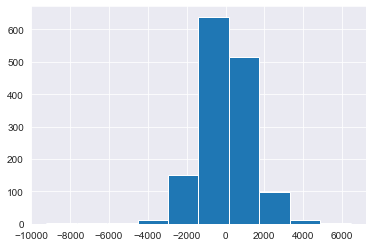

In [31]:
# Assumption -2 mean of the errors should be 0
print("mean of the errors",resid.mean())
plt.hist(resid)

###### Assumption 2 about errors is also satisfied as mean is almost 0

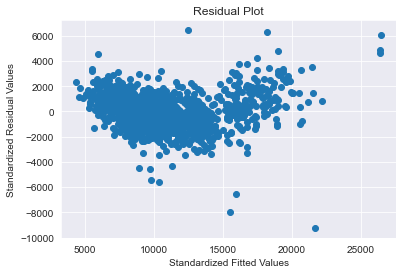

In [32]:
# Assumption 3 -Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
model.fittedvalues # it gives us the predicted values

plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

###### Assumption3 is also satisified as errors are not following any specific pattern i.e Errors are normally distributed and show homoskedasticity

In [33]:
# As we know correlation strength for few variables is less with respect to output 
# I have Built transformed models to check if the accuracy of the model can be  improved
toyota_data['log_HP']=np.log(toyota_data['HP'])
toyota_data['log_Weight']=np.log(toyota_data['Weight'])
toyota_data['log_cc']=np.log(toyota_data['cc'])
toyota_data['log_Quarterly_Tax']=np.log(toyota_data['Quarterly_Tax'])

In [34]:
toyota_data.head(2)

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax,log_HP,log_Weight,log_cc,log_Quarterly_Tax
0,13500,23,46986,90,3,5,1165,2000,210,4.49981,7.060476,7.600902,5.347108
1,13750,23,72937,90,3,5,1165,2000,210,4.49981,7.060476,7.600902,5.347108


## Building Transformed models

In [98]:
# Building Log Transformed models
import statsmodels.formula.api as smf
model_log_HP = smf.ols('Price~Age_08_04+KM+log_HP+Doors+Gears+Weight+cc+Quarterly_Tax',data=toyota_data).fit()
model_log_HP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1133.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        21:41:53   Log-Likelihood:                -12331.
No. Observations:                1433   AIC:                         2.468e+04
Df Residuals:                    1424   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.033e+04   1692.406    -12.011      0.000   -2.36e+04    -1.7e+04
Age_08_04      -120.7122      2.587    -46.669      0.000    -125.786    -115.638
KM               -0.0178      0.001    -13.665      0.000      -0.020      -0.015
log_HP         3650.0696    298.963     12.209      0.000    3063.614    4236.526
Doors           -31.0404     39.693     -0.782      0.434    -108.903      46.822
Gears           674.0623    192.994      3.493      0.000     295.480    1052.645
Weight           20.3383      1.130     18.006      0.000      18.123      22.554
cc               -2.2944      0.308     -7.443      0.000      -2.899      -1.690
Quarterly_Tax     8.2714      1.449      5.710      0.000       5.430      11.113
==============================================================================
Omnibus:                      240.090   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2665.069
Skew:                          -0.411   Prob(JB):                         0.00
Kurtosis:                       9.630   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Assumptions
###### Finding influential obseravtions 

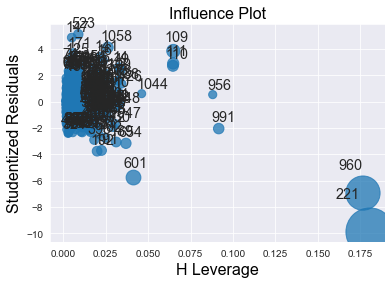

In [99]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_log_HP)
plt.show()

###### No influential observation existing

### error Assumptions

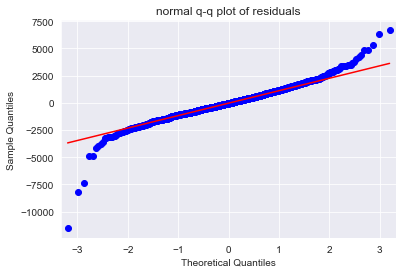

In [100]:
import statsmodels.api as sm
resid=model_log_HP.resid #model.resid gives the error values i.e actual - predicted
qqplot=sm.qqplot(resid,line='q')
plt.title("normal q-q plot of residuals")
plt.show()

mean of the errors -1.7247218326701207e-09


(array([  1.,   1.,   1.,   2.,  30., 396., 790., 191.,  17.,   4.]),
 array([-11490.68128831,  -9673.84649721,  -7857.01170611,  -6040.176915  ,
         -4223.3421239 ,  -2406.50733279,   -589.67254169,   1227.16224941,
          3043.99704052,   4860.83183162,   6677.66662273]),
 <BarContainer object of 10 artists>)

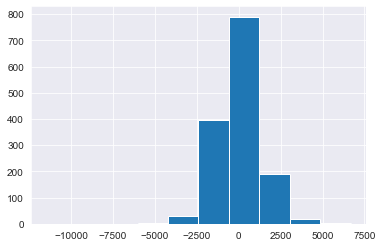

In [101]:
# Assumption -2 mean of the errors should be 0
print("mean of the errors",resid.mean())
plt.hist(resid)

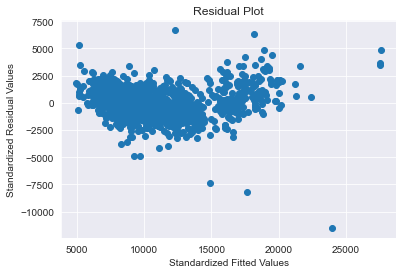

In [102]:
# Assumption 3 -Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
model_log_HP.fittedvalues # it gives us the predicted values

plt.scatter(model_log_HP.fittedvalues,model_log_HP.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [103]:
import statsmodels.formula.api as smf
model_log_Weight = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+log_Weight+cc+Quarterly_Tax',data=toyota_data).fit()
model_log_Weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1167.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        21:43:58   Log-Likelihood:                -12312.
No. Observations:                1433   AIC:                         2.464e+04
Df Residuals:                    1424   BIC:                         2.469e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.532e+05   9090.623    -16.855      0.000   -1.71e+05   -1.35e+05
Age_08_04      -118.8822      2.582    -46.044      0.000    -123.947    -113.817
KM               -0.0178      0.001    -14.001      0.000      -0.020      -0.015
HP               38.9152      2.904     13.401      0.000      33.219      44.611
Doors           -55.2721     39.517     -1.399      0.162    -132.790      22.246
Gears           506.7308    192.205      2.636      0.008     129.696     883.766
log_Weight     2.425e+04   1338.256     18.123      0.000    2.16e+04    2.69e+04
cc               -2.8233      0.313     -9.013      0.000      -3.438      -2.209
Quarterly_Tax     8.8574      1.421      6.232      0.000       6.070      11.645
==============================================================================
Omnibus:                      197.592   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1832.241
Skew:                          -0.296   Prob(JB):                         0.00
Kurtosis:                       8.508   Cond. No.                     2.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Assumptions
###### Finding influential obseravtions 

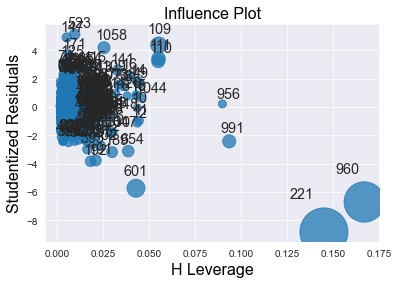

In [104]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_log_Weight)
plt.show()

### error Assumptions

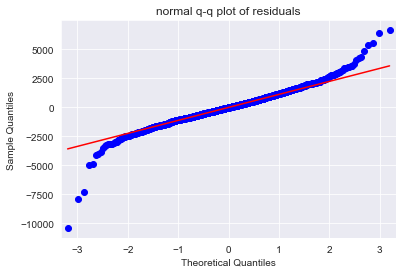

In [105]:
import statsmodels.api as sm
resid=model_log_Weight.resid #model.resid gives the error values i.e actual - predicted
qqplot=sm.qqplot(resid,line='q')
plt.title("normal q-q plot of residuals")
plt.show()

mean of the errors 9.576033538276302e-11


(array([  1.,   2.,   0.,   5.,  72., 560., 646., 131.,  12.,   4.]),
 array([-10395.01349892,  -8692.57038653,  -6990.12727413,  -5287.68416174,
         -3585.24104935,  -1882.79793696,   -180.35482457,   1522.08828782,
          3224.53140022,   4926.97451261,   6629.417625  ]),
 <BarContainer object of 10 artists>)

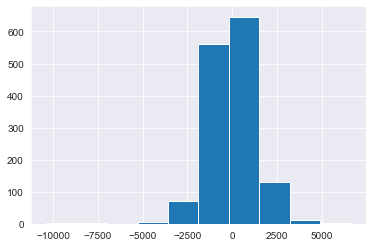

In [106]:
# Assumption -2 mean of the errors should be 0
print("mean of the errors",resid.mean())
plt.hist(resid)

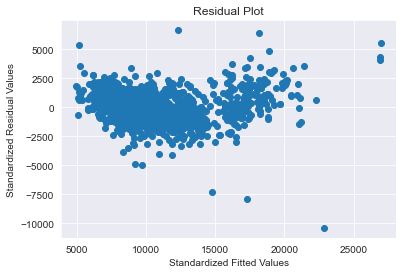

In [107]:
# Assumption 3 -Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
model_log_Weight.fittedvalues # it gives us the predicted values
plt.scatter(model_log_Weight.fittedvalues,model_log_Weight.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [108]:
import statsmodels.formula.api as smf
model_log_cc = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+log_cc+Quarterly_Tax',data=toyota_data).fit()
model_log_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1167.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        21:45:05   Log-Likelihood:                -12312.
No. Observations:                1433   AIC:                         2.464e+04
Df Residuals:                    1424   BIC:                         2.469e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.015e+04   3236.984      6.226      0.000    1.38e+04    2.65e+04
Age_08_04      -120.6679      2.552    -47.287      0.000    -125.674    -115.662
KM               -0.0176      0.001    -13.829      0.000      -0.020      -0.015
HP               41.4067      2.979     13.898      0.000      35.562      47.251
Doors           -21.8709     39.058     -0.560      0.576     -98.488      54.747
Gears           512.9224    192.268      2.668      0.008     135.764     890.080
Weight           19.9236      1.106     18.014      0.000      17.754      22.093
log_cc        -4123.1161    475.914     -8.664      0.000   -5056.683   -3189.549
Quarterly_Tax     8.9116      1.410      6.319      0.000       6.145      11.678
==============================================================================
Omnibus:                      239.106   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2610.022
Skew:                          -0.414   Prob(JB):                         0.00
Kurtosis:                       9.560   Cond. No.                     7.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Assumptions
###### Finding influential obseravtions 

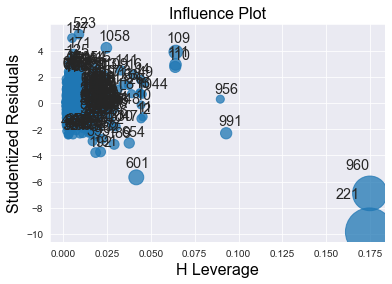

In [109]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_log_cc)
plt.show()

### error Assumptions

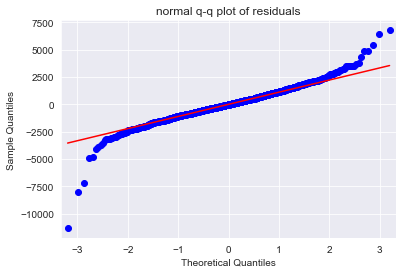

In [110]:
import statsmodels.api as sm
resid=model_log_cc.resid #model.resid gives the error values i.e actual - predicted
qqplot=sm.qqplot(model_log_cc.resid,line='q')
plt.title("normal q-q plot of residuals")
plt.show()

mean of the errors 4.290316896662584e-09


(array([  1.,   1.,   1.,   2.,  37., 447., 761., 166.,  14.,   3.]),
 array([-11307.7186636 ,  -9500.62482343,  -7693.53098327,  -5886.4371431 ,
         -4079.34330294,  -2272.24946277,   -465.15562261,   1341.93821756,
          3149.03205772,   4956.12589789,   6763.21973805]),
 <BarContainer object of 10 artists>)

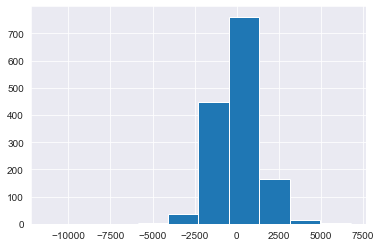

In [111]:
# Assumption -2 mean of the errors should be 0
print("mean of the errors",resid.mean())
plt.hist(resid)


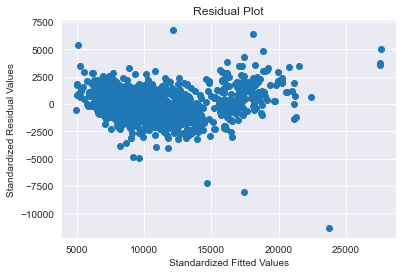

In [112]:
# Assumption 3 -Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
model_log_cc.fittedvalues # it gives us the predicted values
plt.scatter(model_log_cc.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [113]:
import statsmodels.formula.api as smf
model_log_Quarterly_Tax = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+cc+log_Quarterly_Tax',data=toyota_data).fit()
model_log_Quarterly_Tax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        21:46:02   Log-Likelihood:                -12325.
No. Observations:                1433   AIC:                         2.467e+04
Df Residuals:                    1424   BIC:                         2.471e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -9283.3816   1340.860     -6.923      0.000   -1.19e+04   -6653.108
Age_08_04          -121.0759      2.573    -47.065      0.000    -126.122    -116.030
KM                   -0.0174      0.001    -13.552      0.000      -0.020      -0.015
HP                   34.1901      2.698     12.672      0.000      28.897      39.483
Doors               -39.3894     39.454     -0.998      0.318    -116.784      38.006
Gears               544.1020    193.936      2.806      0.005     163.672     924.532
Weight               21.5944      1.073     20.130      0.000      19.490      23.699
cc                   -2.0659      0.291     -7.099      0.000      -2.637      -1.495
log_Quarterly_Tax   458.8833     98.246      4.671      0.000     266.162     651.605
==============================================================================
Omnibus:                      288.147   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3626.960
Skew:                          -0.552   Prob(JB):                         0.00
Kurtosis:                      10.715   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Assumptions
###### Finding influential obseravtions 

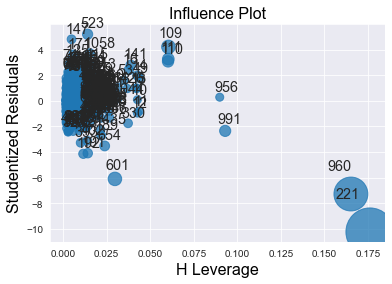

In [114]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_log_Quarterly_Tax)
plt.show()

### error Assumptions


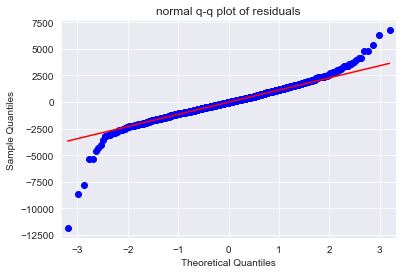

In [115]:
import statsmodels.api as sm
resid=model_log_Quarterly_Tax.resid #model.resid gives the error values i.e actual - predicted
qqplot=sm.qqplot(resid,line='q')
plt.title("normal q-q plot of residuals")
plt.show()

mean of the errors 1.2059239679570548e-09


(array([  1.,   1.,   1.,   3.,  19., 365., 819., 205.,  16.,   3.]),
 array([-11842.37141706,  -9982.50740264,  -8122.64338822,  -6262.77937379,
         -4402.91535937,  -2543.05134494,   -683.18733052,   1176.67668391,
          3036.54069833,   4896.40471275,   6756.26872718]),
 <BarContainer object of 10 artists>)

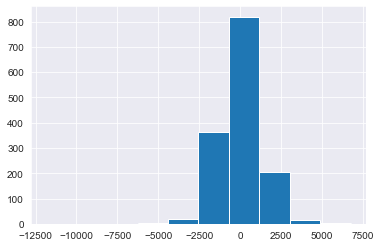

In [117]:
# Assumption -2 mean of the errors should be 0
print("mean of the errors",model_log_Quarterly_Tax.resid.mean())
plt.hist(model_log_Quarterly_Tax.resid)

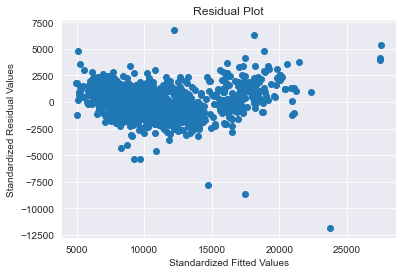

In [118]:
# Assumption 3 -Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
model.fittedvalues # it gives us the predicted values

plt.scatter(model.fittedvalues,model_log_Quarterly_Tax.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [119]:
# Build Exponential model
import statsmodels.formula.api as smf
model_exp= smf.ols('np.log(Price)~Age_08_04+KM+HP+Doors+Gears+Weight+cc+Quarterly_Tax',data=toyota_data).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        21:47:46   Log-Likelihood:                 1085.2
No. Observations:                1433   AIC:                            -2152.
Df Residuals:                    1424   BIC:                            -2105.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4834      0.120     70.583      0.000       8.248       8.719
Age_08_04        -0.0103      0.000    -46.150      0.000      -0.011      -0.010
KM            -1.894e-06   1.11e-07    -17.079      0.000   -2.11e-06   -1.68e-06
HP                0.0030      0.000     11.718      0.000       0.002       0.003
Doors             0.0095      0.003      2.777      0.006       0.003       0.016
Gears             0.0651      0.017      3.893      0.000       0.032       0.098
Weight            0.0008   9.72e-05      8.576      0.000       0.001       0.001
cc               -0.0001   2.67e-05     -4.332      0.000      -0.000   -6.32e-05
Quarterly_Tax     0.0009      0.000      6.914      0.000       0.001       0.001
==============================================================================
Omnibus:                      197.330   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              797.013
Skew:                          -0.609   Prob(JB):                    8.53e-174
Kurtosis:                       6.445   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Assumptions
## Finding influential obseravtions 

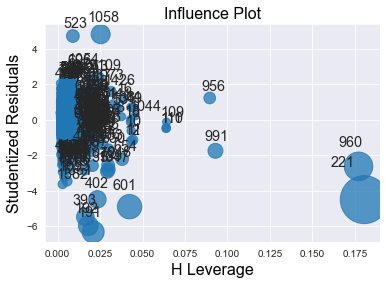

In [120]:
## Finding influential obseravtions using exp model
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_exp)
plt.show()

###### from the above we know threshold lev value is 0.02092050209205021 and we can see from the above plot there is no record above 0.Hence no influencial values existing for the model

### error Assumptions

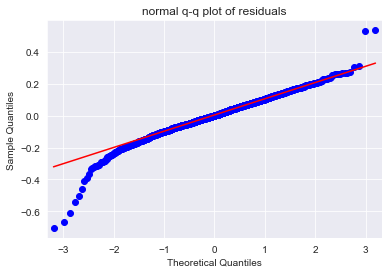

In [95]:
import statsmodels.api as sm
resid=model_exp.resid #model.resid gives the error values i.e actual - predicted
qqplot=sm.qqplot(resid,line='q')
plt.title("normal q-q plot of residuals")
plt.show()

#### the errors are normally distributed

mean of the errors 1.4605297664467292e-13


(array([  3.,   3.,   4.,  36., 235., 624., 444.,  80.,   2.,   2.]),
 array([-0.70396293, -0.57988846, -0.45581399, -0.33173953, -0.20766506,
        -0.08359059,  0.04048388,  0.16455834,  0.28863281,  0.41270728,
         0.53678174]),
 <BarContainer object of 10 artists>)

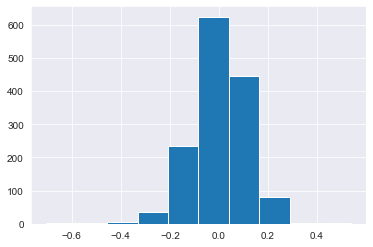

In [96]:
# Assumption -2 mean of the errors should be 0
print("mean of the errors",model_exp.resid.mean())
plt.hist(model_exp.resid)

#### The mean of the errors is almost 0

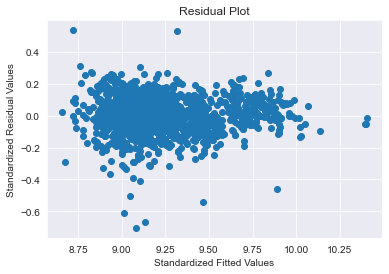

In [97]:

# Assumption 3 -Errors should not follow any pattern they should be independent of eachother
# That can be checked using Residual plot for homoscedasticity
plt.scatter(model_exp.fittedvalues,model_exp.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### Errors are independent of each other and follow homoscedasticity

#### All The models are performing almost similar lets check which model is accurate for the dataset and if there are any overfitting models using cross validation

### Evaluating different models using cross validation

In [45]:
# split the data into train and test
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(toyota_data,test_size=0.2)

In [46]:
train_data

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax,log_HP,log_Weight,log_cc,log_Quarterly_Tax
459,10990,53,70239,110,3,5,1040,1600,69,4.700480,6.946976,7.377759,4.234107
282,12850,39,45713,97,5,5,1085,1400,19,4.574711,6.989335,7.244228,2.944439
538,10950,56,46500,86,5,5,1035,1300,69,4.454347,6.942157,7.170120,4.234107
194,13250,41,123425,69,5,5,1140,1900,185,4.234107,7.038784,7.549609,5.220356
143,18500,16,20629,110,4,5,1090,1600,85,4.700480,6.993933,7.377759,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,7900,68,33847,86,4,5,1000,1300,69,4.454347,6.907755,7.170120,4.234107
495,11250,52,58596,110,3,5,1045,1600,69,4.700480,6.951772,7.377759,4.234107
869,10450,61,63000,86,3,5,1050,1300,69,4.454347,6.956545,7.170120,4.234107
207,10950,43,85017,97,5,5,1060,1400,85,4.574711,6.966024,7.244228,4.442651


In [47]:
test_data

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax,log_HP,log_Weight,log_cc,log_Quarterly_Tax
502,9900,53,57475,110,3,5,1040,1600,69,4.700480,6.946976,7.377759,4.234107
1128,7500,78,109263,110,5,5,1070,1600,85,4.700480,6.975414,7.377759,4.442651
691,9950,61,97648,110,3,6,1065,1600,85,4.700480,6.970730,7.377759,4.442651
788,8950,65,75000,86,3,5,1015,1300,19,4.454347,6.922644,7.170120,2.944439
120,18950,13,57037,110,5,5,1115,1600,85,4.700480,7.016610,7.377759,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,8500,80,100458,110,5,5,1085,1600,85,4.700480,6.989335,7.377759,4.442651
191,4350,44,158320,69,5,5,1110,1800,64,4.234107,7.012115,7.495542,4.158883
1237,5950,78,82595,86,3,5,1015,1300,19,4.454347,6.922644,7.170120,2.944439
561,10750,54,39000,97,3,5,1025,1400,69,4.574711,6.932448,7.244228,4.234107


In [48]:
# Define RMSE - sqrt of mean square errors
# as rmse is scale dependent 
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [49]:
#define MAPE -Mean Absolute percentage error
# Mape is scale free which gives accuate insights about the goodness of the model
def MAPE(pred,actual):
    return np.mean(abs(pred-actual)/actual)*100

### Train the model using training data - Using Basic Model

In [67]:
train_model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+cc+Quarterly_Tax',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Price
Rmse_train_basic=RMSE(train_yhat,train_y)
round(Rmse_train_basic,4)
Mape_train_basic=MAPE(train_yhat,train_y)
print(round(Rmse_train_basic,4),round(Mape_train_basic,4))

1306.1912 9.3913


In [68]:
### Test the model using testing data -For Basic Model

In [56]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price
Rmse_test_basic=RMSE(predtest,actualtest)
Mape_test_basic=MAPE(predtest,actualtest)
print(round(Rmse_test_basic,4),round(Mape_test_basic,4))

1326.5244 9.6995


### Train the model using training data - Log Transformation Models

In [69]:
## for log_HP
train_model=smf.ols('Price~Age_08_04+KM+log_HP+Doors+Gears+Weight+cc+Quarterly_Tax',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Price
Rmse_train_log_HP=RMSE(train_yhat,train_y)
round(Rmse_train_log_HP,4)
Mape_train_log_HP=MAPE(train_yhat,train_y)
print(round(Rmse_train_log_HP,4),round(Mape_train_log_HP,4))

1318.8123 9.4703


In [70]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price
Rmse_test_log_HP=RMSE(predtest,actualtest)
Mape_test_log_HP=MAPE(predtest,actualtest)
print(round(Rmse_test_log_HP,4),round(Mape_test_log_HP,4))

1340.6322 9.7656


In [71]:

train_model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+log_Weight+cc+Quarterly_Tax',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Price
Rmse_train_log_Weight=RMSE(train_yhat,train_y)
#round(Rmse_train_log_HP,4)
Mape_train_log_Weight=MAPE(train_yhat,train_y)
print(round(Rmse_train_log_Weight,4),round(Mape_train_log_Weight,4))

1302.2912 9.3862


In [72]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price
Rmse_test_log_Weight=RMSE(predtest,actualtest)
Mape_test_log_Weight=MAPE(predtest,actualtest)
print(round(Rmse_test_log_Weight,4),round(Mape_test_log_Weight,4))

1321.5753 9.7029


In [73]:
train_model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+log_cc+Quarterly_Tax',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Price
Rmse_train_log_cc=RMSE(train_yhat,train_y)
#round(Rmse_train_log_HP,4)
Mape_train_log_cc=MAPE(train_yhat,train_y)
print(round(Rmse_train_log_cc,4),round(Mape_train_log_cc,4))

1302.1694 9.3447


In [74]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price
Rmse_test_log_cc=RMSE(predtest,actualtest)
Mape_test_log_cc=MAPE(predtest,actualtest)
print(round(Rmse_test_log_cc,4),round(Mape_test_log_cc,4))

1321.6927 9.6432


In [75]:
train_model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+cc+log_Quarterly_Tax',data = train_data).fit()
train_yhat=train_model.predict(train_data)
train_y = train_data.Price
Rmse_train_log_Quarterly=RMSE(train_yhat,train_y)
#round(Rmse_train_log_HP,4)
Mape_train_log_Quarterly=MAPE(train_yhat,train_y)
print(round(Rmse_train_log_Quarterly,4),round(Mape_train_log_Quarterly,4))

1312.4341 9.415


In [76]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price
Rmse_test_log_Quarterly=RMSE(predtest,actualtest)
Mape_test_log_Quarterly=MAPE(predtest,actualtest)
print(round(Rmse_test_log_Quarterly,4),round(Mape_test_log_Quarterly,4))

1339.7789 9.7144


In [77]:
train_model=smf.ols('np.log(Price)~Age_08_04+KM+HP+Doors+Gears+Weight+cc+Quarterly_Tax',data = train_data).fit()
train_yhat=np.exp(train_model.predict(train_data))
train_y = train_data.Price
Rmse_train_exp=RMSE(train_yhat,train_y)
#round(Rmse_train_log_HP,4)
Mape_train_exp=MAPE(train_yhat,train_y)
print(round(Rmse_train_exp,4),round(Mape_train_exp,4))

1185.1188 8.6473


In [81]:
toyota_data.head(1)

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,cc,Quarterly_Tax,log_HP,log_Weight,log_cc,log_Quarterly_Tax
0,13500,23,46986,90,3,5,1165,2000,210,4.49981,7.060476,7.600902,5.347108


In [79]:
predtest=np.exp(train_model.predict(test_data))
actualtest=test_data.Price
Rmse_test_exp=RMSE(predtest,actualtest)
Mape_test_exp=MAPE(predtest,actualtest)
print(round(Rmse_test_exp,4),round(Mape_test_exp,4))

1134.4702 8.766


### Comparision Table which compares different models

In [93]:
# creating comparision table for comparing different models
model_comarision_table = pd.DataFrame({'model':['Basic_model','Log_model_HP','Log_model_Weight','Log_model_cc','Log_model_Quarterly_Tax','Exponential_model'],
                                      'R_squared':[model.rsquared,model_log_HP.rsquared,model_log_Weight.rsquared,model_log_cc.rsquared,model_log_Quarterly_Tax.rsquared,model_exp.rsquared],
                                      'AIC':[model.aic,model_log_HP.aic,model_log_Weight.aic,model_log_cc.aic,model_log_Quarterly_Tax.aic,model_exp.aic],
                                      'Train_RMSE':[Rmse_train_basic,Rmse_train_log_HP,Rmse_train_log_Weight,Rmse_train_log_cc,Rmse_train_log_Quarterly,Rmse_train_exp],
                                      'Test_RMSE':[Rmse_test_basic,Rmse_test_log_HP,Rmse_test_log_Weight,Rmse_test_log_cc,Rmse_test_log_Quarterly,Rmse_test_exp],
                                      'Train_Mape':[Mape_train_basic,Mape_train_log_HP,Mape_train_log_Weight,Mape_train_log_cc,Mape_train_log_Quarterly,Mape_train_exp],
                                      'Test_Mape':[Mape_test_basic,Mape_test_log_HP,Mape_test_log_Weight,Mape_test_log_cc,Mape_test_log_Quarterly,Mape_test_exp]})
model_comarision_table

,model,R_squared,AIC,Train_RMSE,Test_RMSE,Train_Mape,Test_Mape
0,Basic_model,0.866831,24651.370790,1306.191213,1326.524411,9.391287,9.699529
1,Log_model_HP,0.864196,24679.442663,1318.812338,1340.632151,9.470282,9.765600
2,Log_model_Weight,0.867693,24642.065606,1302.291153,1321.575276,9.386177,9.702945
3,Log_model_cc,0.867662,24642.400403,1302.169377,1321.692728,9.344732,9.643179
4,Log_model_Quarterly_Tax,0.865317,24667.566508,1312.434082,1339.778926,9.414999,9.714393
5,Exponential_model,0.851151,-2152.402922,1185.118774,1134.470171,8.647271,8.766012


## Conclusion

##### By comparing different models based on different parameters as above we can conclude exponential model is performing well for the given dataset which gives high accuracy compared to other models with both train and test data